# Introduction
## The Data
The iris dataset contains four numerical features (sepal length, sepal width, petal length, and petal width) and one target variable (species). 
## The Goal
The goal of this notebook is to explore the iris dataset and apply a Gaussian Naive Bayes algorithim to classify samples into one of three species.

### Step 1. Environment Set Up
Ensure your virtual environment has these packages installed and has been activated before running the code. 

This notebook requires the following dependencies:

Pandas: Version 2.2.3

Numpy: Version 2.1.3

Seaborn: 0.13.2

Matplotlib: 3.10.0

Scikit-learn: 1.6.1

In [3]:
import pandas as pd

df = pd.read_csv("/Users/rachel/Desktop/binf5507git/BINF5507/Capstone/Data/Iris_Data.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Step 2. Assess feature distribution & transform non-parametric features

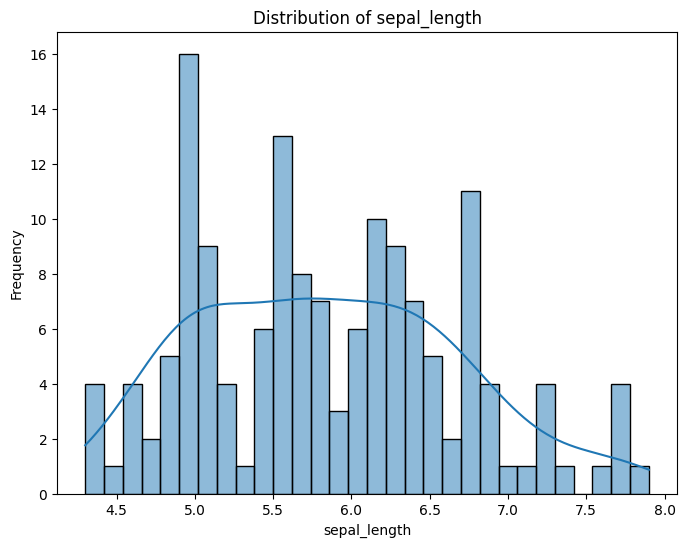

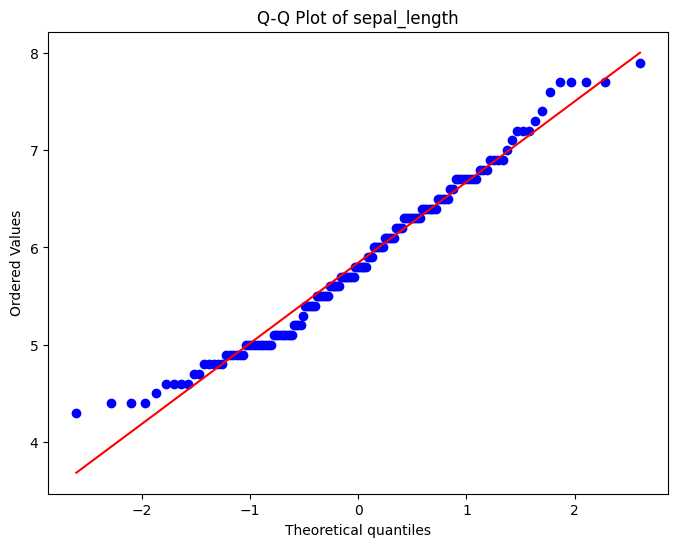

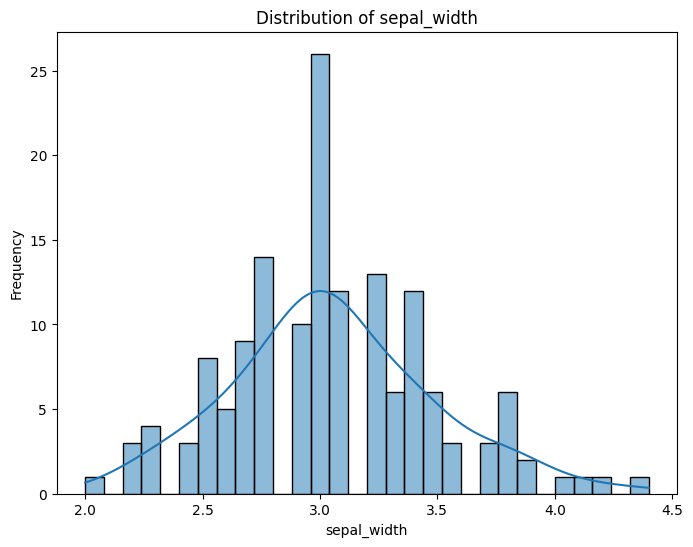

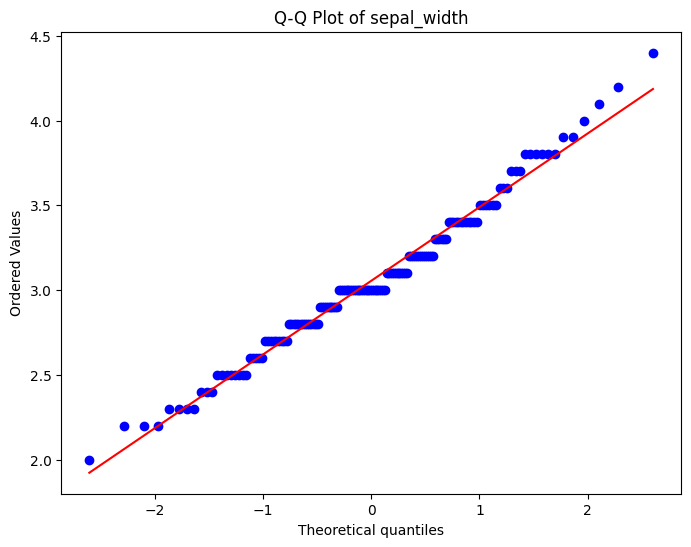

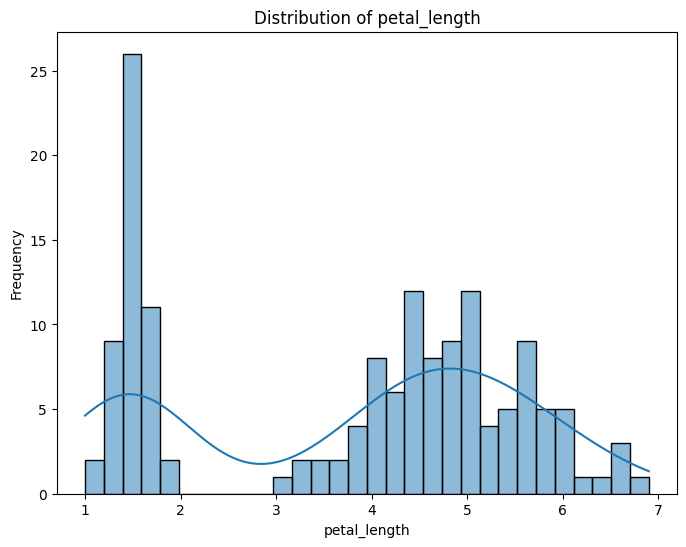

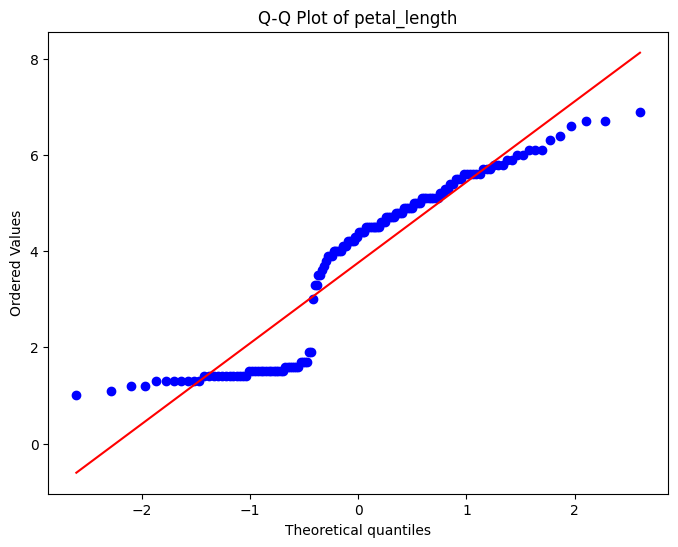

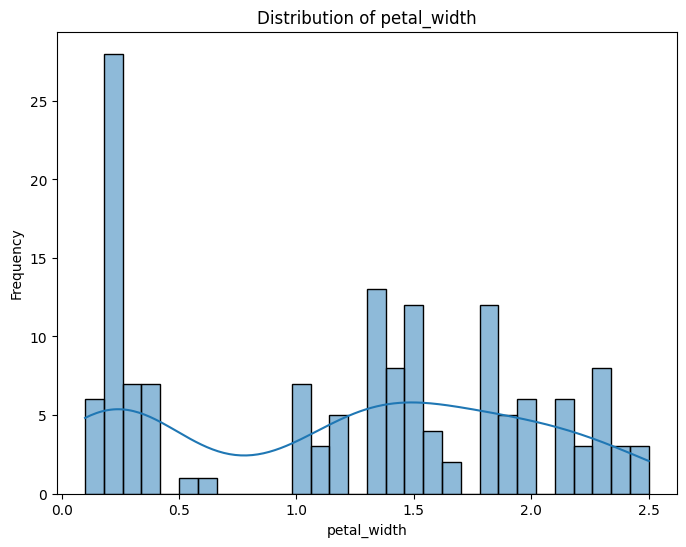

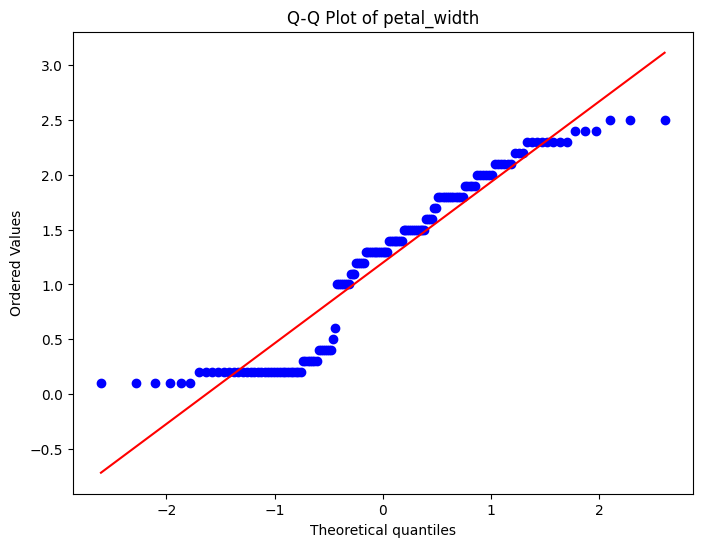

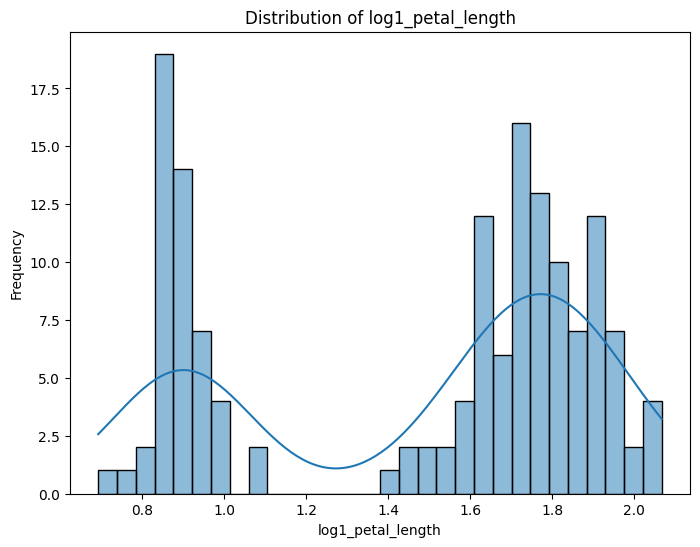

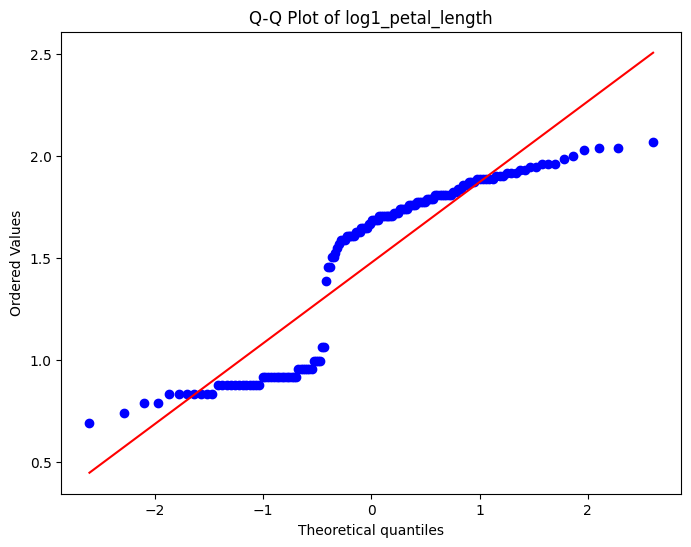

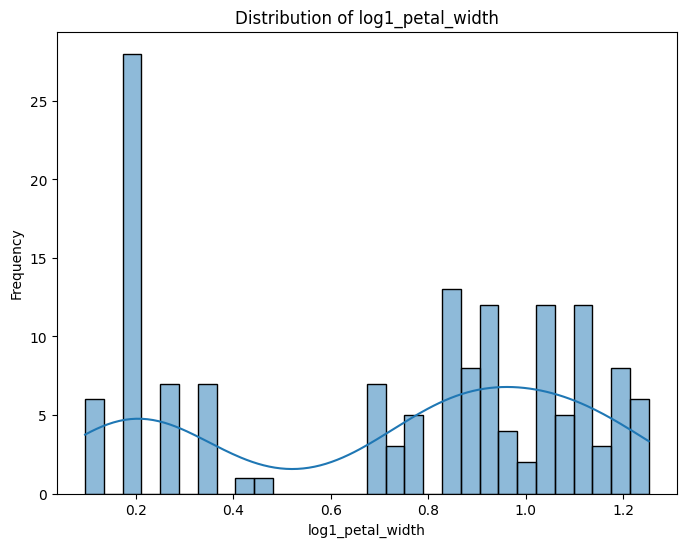

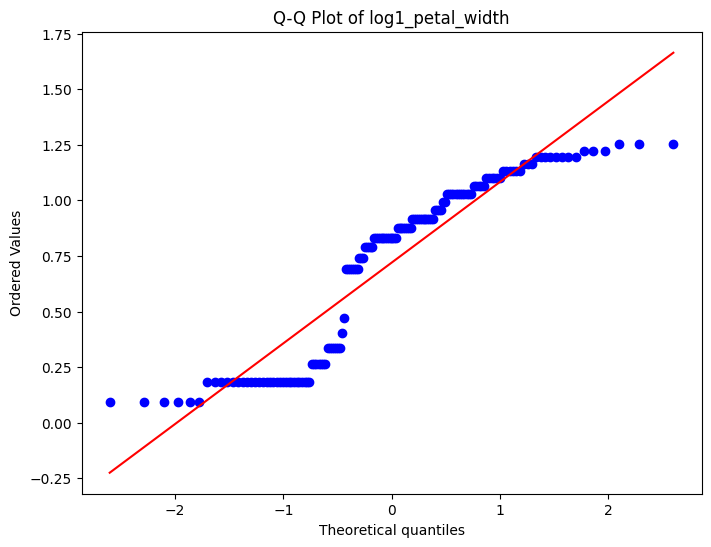

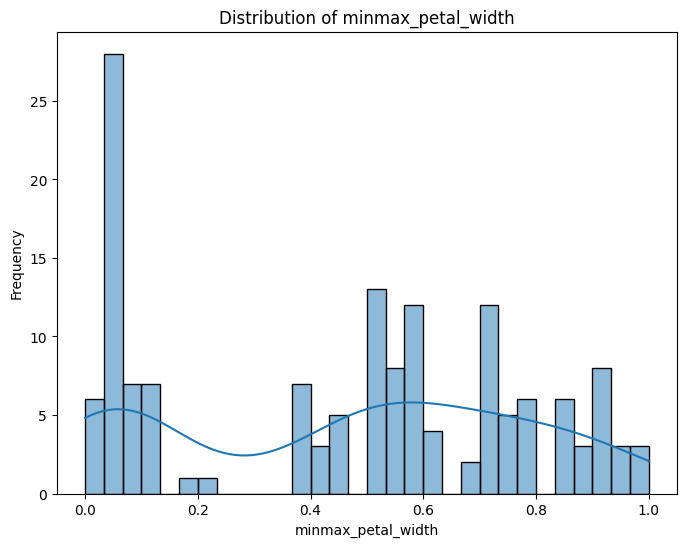

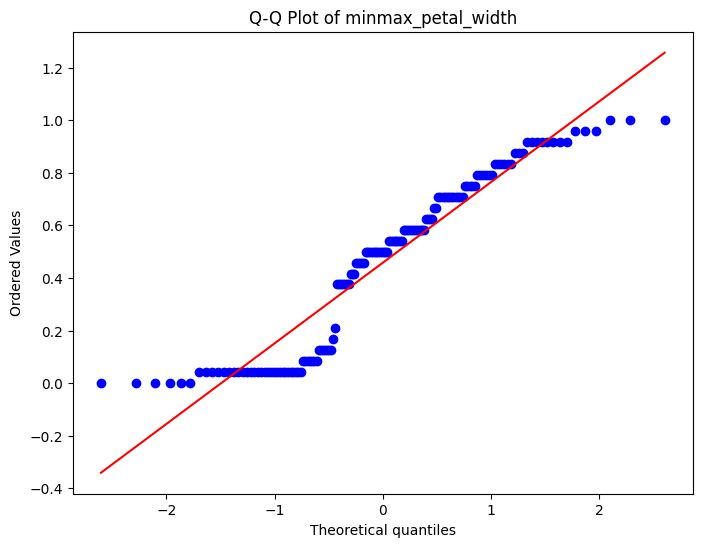

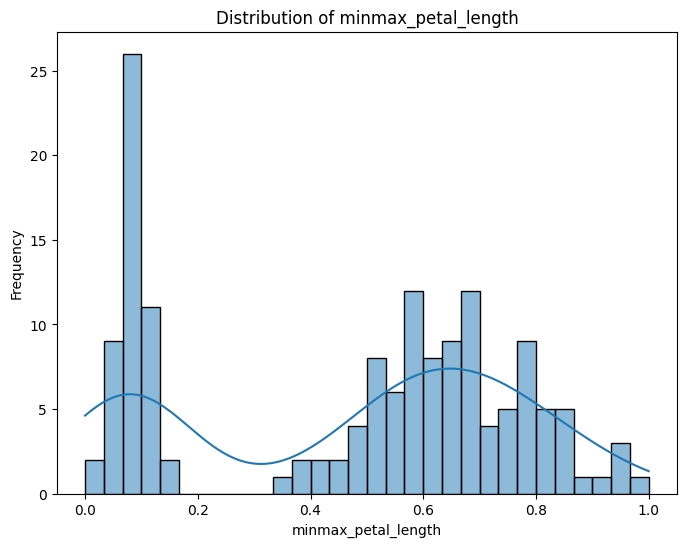

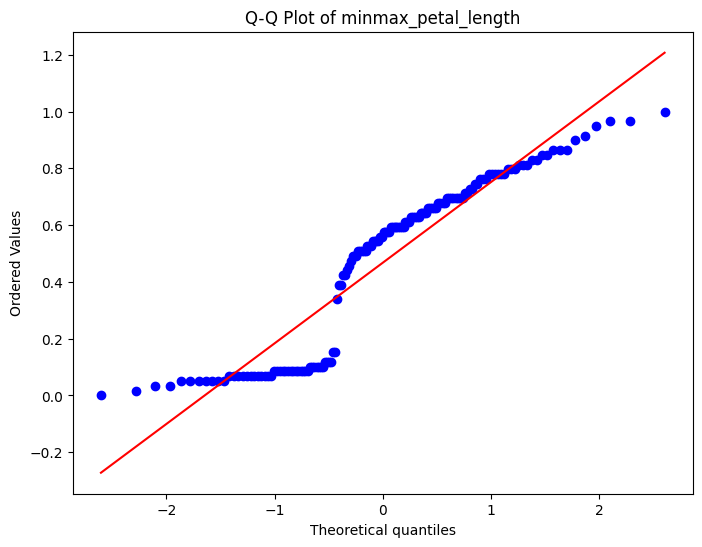

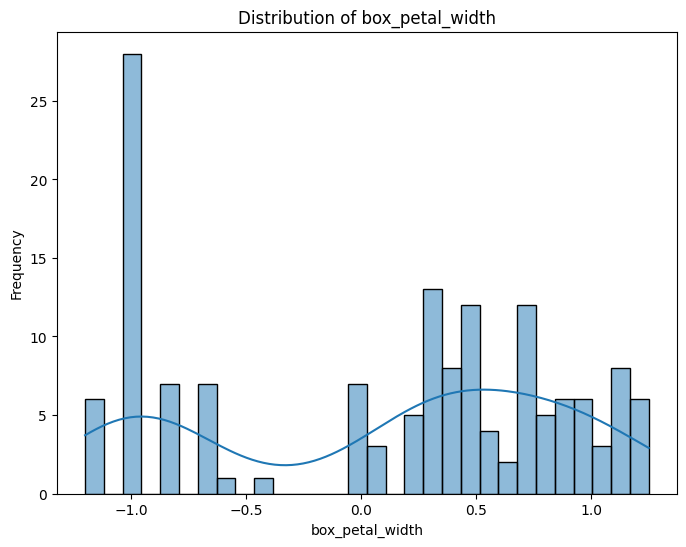

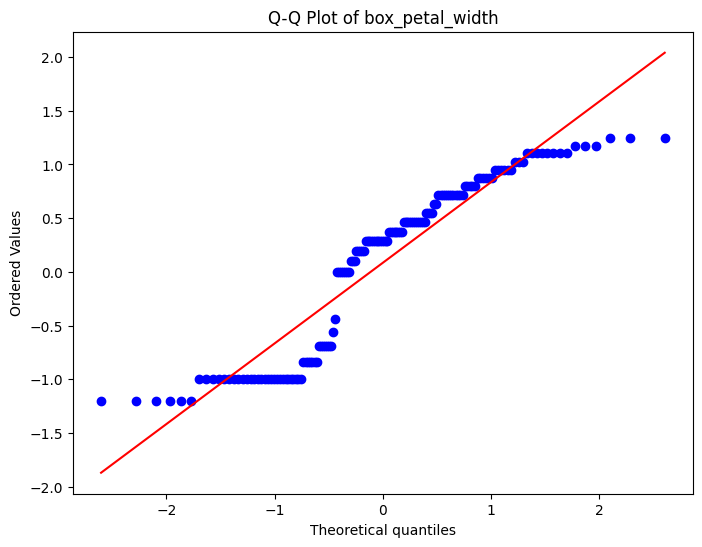

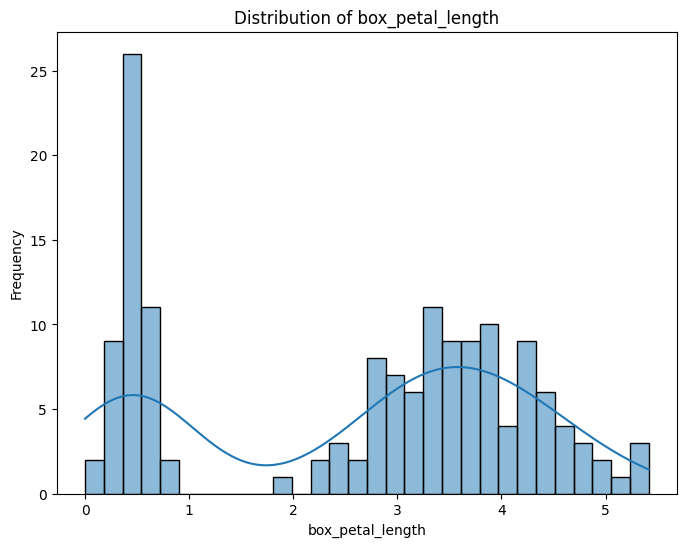

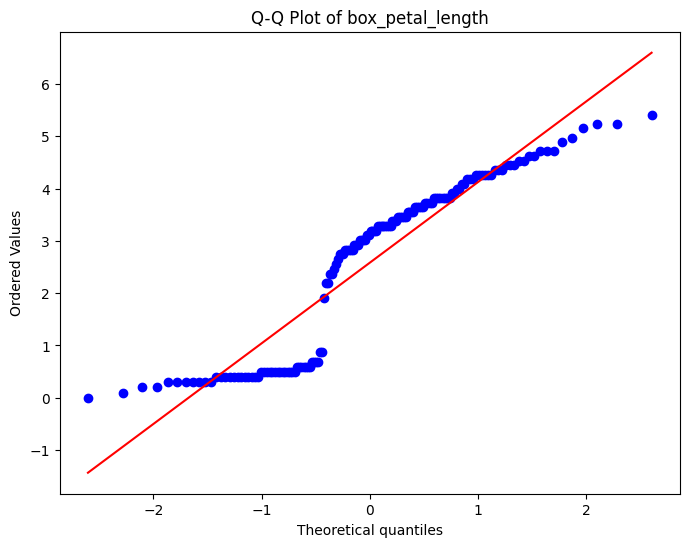

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

df_features = df.drop('species', axis =1)

# Apply square root transformation to non-normal features 
df_features['log1_petal_length'] = np.log1p(df_features['petal_length'])
df_features['log1_petal_width'] = np.log1p(df_features['petal_width'])

# Apply Min-Max scaling
scaler = MinMaxScaler()
df_features['minmax_petal_width'] = scaler.fit_transform(df_features[['petal_width']])
df_features['minmax_petal_length'] = scaler.fit_transform(df_features[['petal_length']])

# Apply Box-Cox transformation (only works for positive values)
df_features['box_petal_width'], lambda_value = stats.boxcox(df_features['petal_width'])
df_features['box_petal_length'], lambda_value = stats.boxcox(df_features['petal_length'])

column_list = df_features.columns

# Dictionary to store the plots
plots = {}

# QQ Plot - petal length
for column in column_list:
    # Create histogram and KDE
    fig1, ax1 = plt.subplots(figsize=(8, 6))
    sns.histplot(df_features[column], kde=True, bins=30, ax=ax1)
    ax1.set_title(f"Distribution of {column}")
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frequency')
    plots[f"{column}_histogram_kde"] = fig1  
    

    # Create Q-Q plot
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    stats.probplot(df_features[column], dist="norm", plot=ax2)
    ax2.set_title(f"Q-Q Plot of {column}")
    plots[f"{column}_qq_plot"] = fig2
    




### Step 3. Apply the model

- Log transformed values for petal width and length
- Min-max scaled values for all features 
- Boxcox transformed values for petal width and length
- Untransformed values (as a baseline for comparison)

Accuracy: 0.977778
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



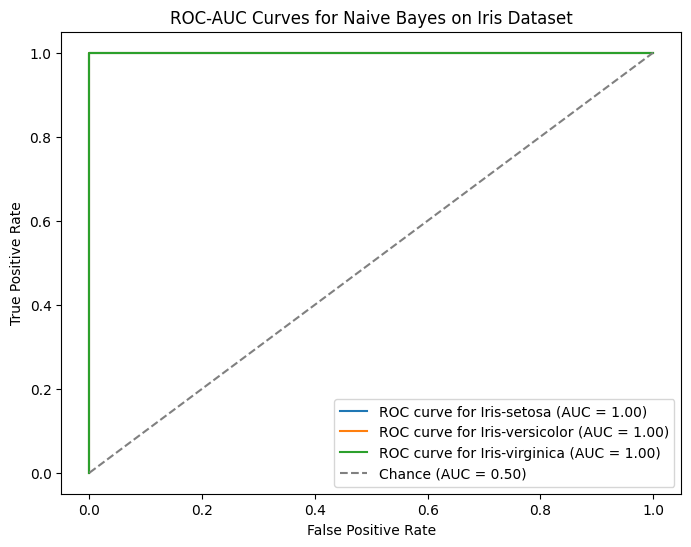

In [8]:
# Log 1 transformed values 

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Define features and target
X = df_features[['sepal_length', 'sepal_width', 'log1_petal_length', 'log1_petal_width']]
y = df['species']

# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on test data
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

# Detailed classification report
print(classification_report(y_test, y_pred))
# Binarize target labels for multi-class ROC
y_bin = label_binarize(y_test, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

# Get class probabilities for ROC
y_score = gnb.predict_proba(X_test)
n_classes = y_bin.shape[1]
# Plot ROC-AUC curves for each class
plt.figure(figsize=(8, 6))

for i, class_name in enumerate(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"ROC curve for {class_name} (AUC = {roc_auc:.2f})")

# Plot random chance line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Chance (AUC = 0.50)")

# Add plot details
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curves for Naive Bayes on Iris Dataset")
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.977778
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



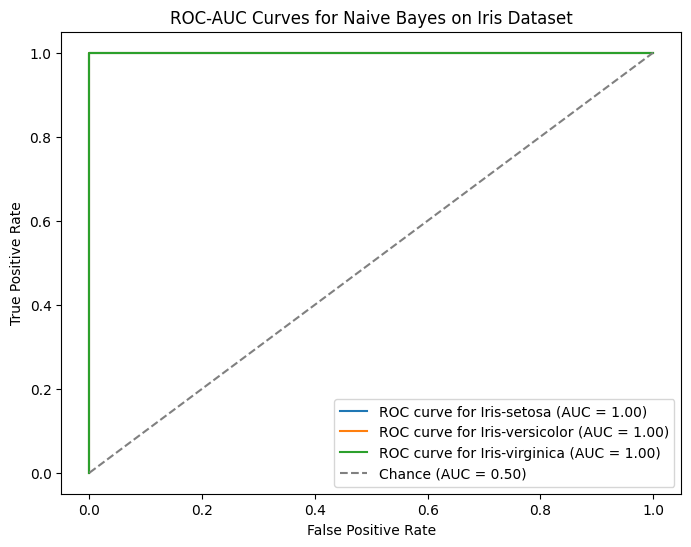

In [9]:
# Minmax normalized values for petal length and width
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Define features and target
X = df_features[['sepal_length', 'sepal_width', 'minmax_petal_length', 'minmax_petal_width']]
y = df['species']

# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on test data
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

# Detailed classification report
print(classification_report(y_test, y_pred))
# ROC AUC Curves
# Binarize target labels for multi-class ROC
y_bin = label_binarize(y_test, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

# Get class probabilities for ROC
y_score = gnb.predict_proba(X_test)
n_classes = y_bin.shape[1]
# Plot ROC-AUC curves for each class
plt.figure(figsize=(8, 6))

for i, class_name in enumerate(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"ROC curve for {class_name} (AUC = {roc_auc:.2f})")

# Plot random chance line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Chance (AUC = 0.50)")

# Add plot details
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curves for Naive Bayes on Iris Dataset")
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.977778
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



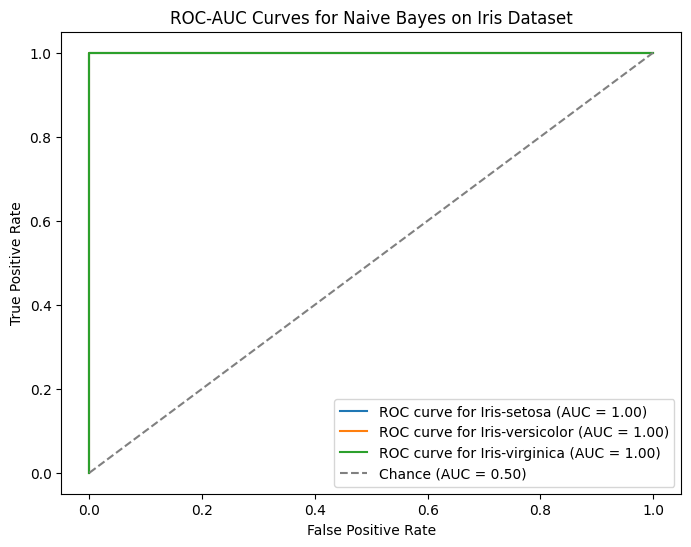

In [10]:
# Untransformed values for petal length and petal width
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Define features and target
X = df_features[['sepal_length', 'sepal_width', 'box_petal_length', 'box_petal_width']]
y = df['species']

# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on test data
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

# Detailed classification report
print(classification_report(y_test, y_pred))
# ROC AUC Curves
# Binarize target labels for multi-class ROC
y_bin = label_binarize(y_test, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

# Get class probabilities for ROC
y_score = gnb.predict_proba(X_test)
n_classes = y_bin.shape[1]
# Plot ROC-AUC curves for each class
plt.figure(figsize=(8, 6))

for i, class_name in enumerate(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"ROC curve for {class_name} (AUC = {roc_auc:.2f})")

# Plot random chance line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Chance (AUC = 0.50)")

# Add plot details
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curves for Naive Bayes on Iris Dataset")
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.977778
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



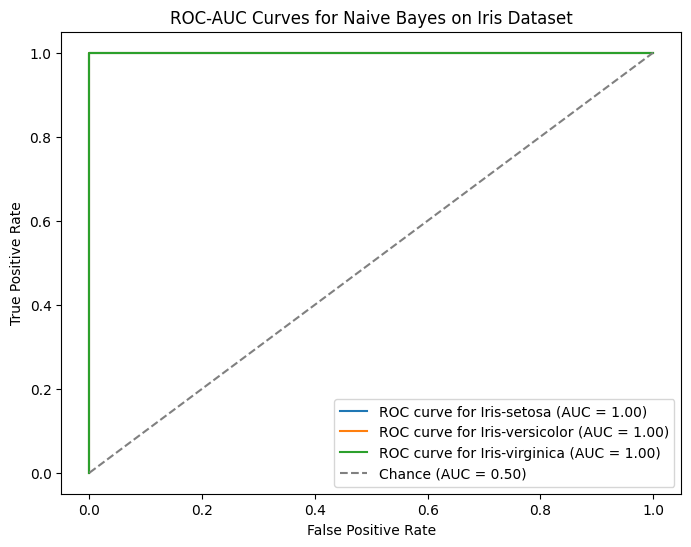

In [ ]:
# Untransformed values for petal length and petal width

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Define features and target
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on test data
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

# Detailed classification report
print(classification_report(y_test, y_pred))

# ROC AUC Curves
# Binarize target labels for multi-class ROC
y_bin = label_binarize(y_test, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

# Get class probabilities for ROC
y_score = gnb.predict_proba(X_test)
n_classes = y_bin.shape[1]
# Plot ROC-AUC curves for each class
plt.figure(figsize=(8, 6))

for i, class_name in enumerate(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"ROC curve for {class_name} (AUC = {roc_auc:.2f})")

# Plot random chance line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Chance (AUC = 0.50)")

# Add plot details
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curves for Naive Bayes on Iris Dataset")
plt.legend(loc="lower right")
plt.show()



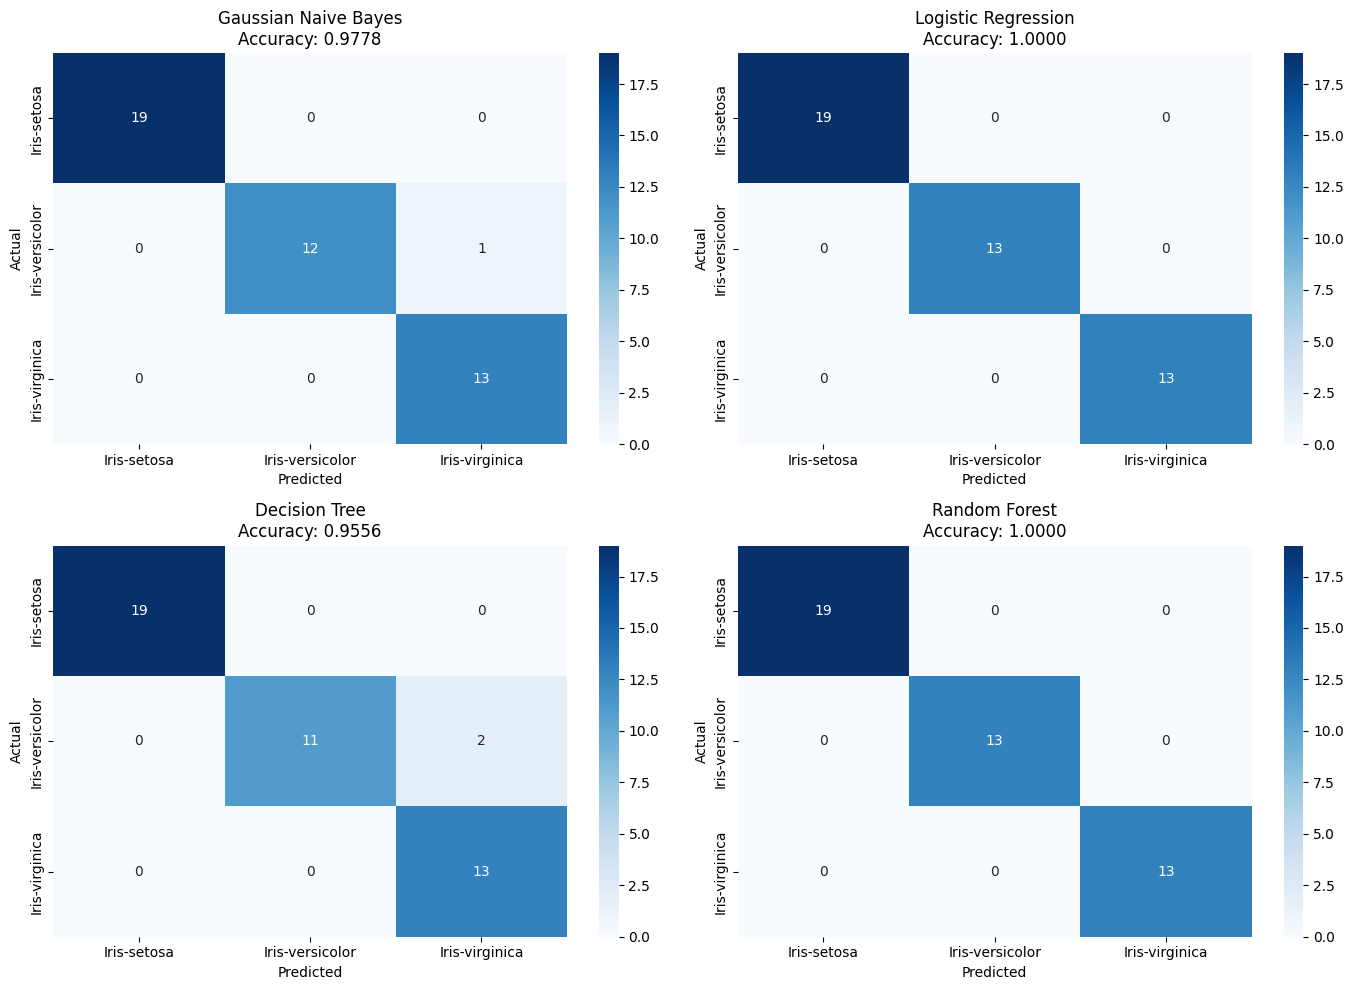

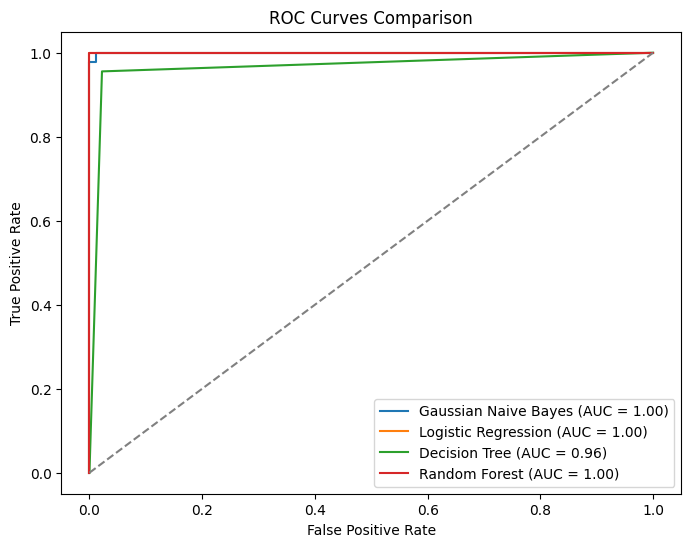

Gaussian Naive Bayes - Accuracy: 0.9778, AUC: 1.0000
Logistic Regression - Accuracy: 1.0000, AUC: 1.0000
Decision Tree - Accuracy: 0.9556, AUC: 0.9639
Random Forest - Accuracy: 1.0000, AUC: 1.0000


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

# Models we are comparing
models = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = {}

y_train_bin = label_binarize(y_train, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']) 
y_test_bin = label_binarize(y_test, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate AUC for each class in a one-vs-rest manner
    auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr', average='macro')  # macro-averaged AUC
    
    # ROC curve: one-vs-rest for multi-class
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())  # Flatten the arrays for ROC calculation
    
    results[model_name] = {
        'accuracy': acc, 
        'conf_matrix': cm, 
        'auc': auc, 
        'fpr': fpr, 
        'tpr': tpr
    }

# Confusion matrix
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (model_name, result) in enumerate(results.items()):
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
    axes[idx].set_title(f'{model_name}\nAccuracy: {result["accuracy"]:.4f}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curves for all models
plt.figure(figsize=(8,6))
for model_name, result in results.items():
    plt.plot(result['fpr'], result['tpr'], label=f'{model_name} (AUC = {result["auc"]:.2f})')

plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()

# Accuracy and AUC comparison
for model_name, result in results.items():
    print(f'{model_name} - Accuracy: {result["accuracy"]:.4f}, AUC: {result["auc"]:.4f}')
